In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import csv
import numpy as np
import pandas as pd
import pickle
import random
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"c'mon": "come on"
}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
!pip install bnlp_toolkit
!pip install bangla-stemmer

In [11]:
from bnlp.basic_tokenizer import BasicTokenizer
basic_t = BasicTokenizer()

In [ ]:
from bnlp.bengali_fasttext import Bengali_Fasttext

bft = Bengali_Fasttext()

In [ ]:
from bnlp.bengali_word2vec import Bengali_Word2Vec
bwv = Bengali_Word2Vec(True)
# import gensim

# # Load pre-trained Word2Vec model.
# model = gensim.models.Word2Vec.load("/content/drive/My Drive/Research_Shanto/pretrained/bengali_word2vec/bengali_word2vec.model")


In [ ]:
# model.wv.vocab

{'ইসরায়েল-মার্কিন': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5a8d0>,
 'সম্পর্ক': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5a978>,
 'বলতে': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5a9b0>,
 'ইসরায়েল': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5a9e8>,
 'এবং': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5aa20>,
 'মার্কিন': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5aa58>,
 'যুক্তরাষ্ট্রের': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5aa90>,
 'মধ্যে': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5aac8>,
 'দ্বিপক্ষীয়': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5ab00>,
 'বোঝায়।': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5ab38>,
 '১৯৬০': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5ab70>,
 'এর': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5aba8>,
 'দশকে': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5abe0>,
 'যুক্তরাষ্ট্র': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5ac18>,
 'ইসরায়েলের': <gensim.models.keyedvectors.Vocab at 0x7f2e1cb5ac50>,
 

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/finaldataset.csv')

In [7]:
def read(path):
  data = pd.read_csv(path)
  return data

In [ ]:
def rand_sam(data):
  top_n = 2000
  top_data_df_positive1 = data[data['Sentiment'] == 1].head(top_n)
  top_data_df_negative1 = data[data['Sentiment'] == -1].head(top_n)
  top_data_df_neutral = data[data['Sentiment'] == 0].head(top_n)
  top_data_df_positive2 = data[data['Sentiment'] == 2].head(top_n)
  top_data_df_negetive2 = data[data['Sentiment'] == -2].head(top_n)
  top_data_df_small = pd.concat([top_data_df_positive1, top_data_df_negative1, top_data_df_neutral,top_data_df_positive2,top_data_df_negetive2 ])
  return top_data_df_small

In [ ]:
# from bnlp.bengali_word2vec import Bengali_Word2Vec
# bwv = Bengali_Word2Vec()
def w2v(path):
    # path = '/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/new_corpus.txt'
    model_name = "/content/drive/My Drive/Research_Shanto/pretrained/w2v_stemmed.model"
    vector_name = "/content/drive/My Drive/Research_Shanto/pretrained/stemmed_vector.vectors"
    bwv.train_word2vec(path, model_name, vector_name)

In [ ]:
def pretrain(path):
  model_name = "/content/drive/My Drive/Research_Shanto/pretrained/latest_model.bin"
  epoch = 50
  bft.train_fasttext(path, model_name, epoch)

In [ ]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()
def stemming(data):
  ii = 0
  for w in data['Data']:
    tokens = basic_t.tokenize(w)
    
    stm = stmr.stem(tokens)
    # print("tokens : ",tokens)
    # print("stm :",stm)
    st = ""
    for t in stm:
      st += t
      st += ' '
    
    data.at[ii,'Data'] = st
    ii += 1
  return data



In [ ]:
def word_len(data):
  lst = np.zeros(380, dtype=int)
  dic = {}
  # for w in data['Data']:

  ii = 0
  fin = np.zeros(data['Data'].size ,dtype=int)
  t = 0
  for w in data['Data']:
    if(len(w.split()) <3 ):
      data = data.drop([ii], axis=0)
      # print(data['Data'][ii])
    ii += 1


  for w in data['Data']:
    if(len(w.split()) ==0):
      print(w)
    lst[len(w.split())] += 1


  for w in data['Data']:
    dic[len(w.split())] = lst[len(w.split())]

  # print(fin[:30])
  print(dic)
  print(data.shape)

  with open('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/Length_Frequency.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    for Length, Occured in dic.items():
       writer.writerow([Length, Occured])


In [4]:

def punc_conv(data):
  # rem_c = "#$&()/:;<=>@[\\]^_`{}~"
  rem_c = ['#','$','&','(',')',';','<','=','>','@','[',']','^','_','`','{','}','~',':', '"', "'",'–', '—', '‘', '’', '“', '”', '•', '…', '৯৷']
  keep_c = ['!','?', '|',chr(2404),'%', '*', '+','ঃ']
  num = ['১','২','৩','৪','৫','৬','৭','৮','৯','০']
  gone = ['\u202a১', '‰', '⚽️', '✌', '✌✌✌', '\ufff0জীবনযাপন','৷', '৷এবার', '৷জাতীয়', '৷শুভেচ্ছা', '৷সে', '৷২', '৷৩৷', '\u200cকিন্তু', '\u200cকেন', '\u200cকোথায়', '\u200cতাই', '\u200cদে\u200cখে', '\u200cনোয়াখালী', '\u200cফিজিওর', '\u200cবিএন\u200cপি\u200c', '\u200d', '\u200dআগেই', '\u200dআমরা', '\u200dআশাবাদী', '\u200dউচিত', '\u200dউজ্জল', '\u200dউদ্দেশ্যমূলকভাবে', '\u200dউৎপাদনকারী', '\u200dএক্ষেত্রে', '\u200dএবং', '\u200dনির্ভরশীল', '\u200dমিঃ', '\u200dযার', '\u200dযিনি', '\u200dসত্যই', '\u200dসব', '\u200dসী', '\u200dসুষ্ঠ']
  # no_space= "+*%-.,/" #comma space hobe
  #Clear punctions
  ii = 0
  for w in data['Data']:
    te = w
    sa = False
    # print(w)
    tokens = basic_t.tokenize(te)
    
    st = ''
    i = 0
    for t in tokens:
      
      if( (t in keep_c and i+1<len(tokens) and tokens[i+1] == t) or t in rem_c or t in keep_c ):
        sa = True
        i += 1
        continue
      else:
        st += t
      st += ' '
      i +=1 
    fit = basic_t.tokenize(st)    
  
    data.at[ii,'Data'] = st
    
    ii += 1

  print(data.shape)


  ii = 0
  for t in data['Data']:
    tokens = basic_t.tokenize(t)
    paise = False
    for w in tokens:
      if(w in gone):
        paise = True
    
    if(paise):
      data = data.drop([ii], axis=0)
    ii += 1
    
  print(data.head(10))
  return data


In [5]:
def process(data):
  rem_c ="!\"#$%&'(),-./:;=<>?@[]^_`{|}~¥§©’‚“”‪™−√∝∞৷"+ chr(2404)
  ii = 0
  for i in data['Data']:
    st = ""
    tokens = basic_t.tokenize(i)
    for t in tokens:
      if(t in rem_c):
        st += ' '
      else:
        st += t
      st += ' '
    data.at[ii,'Data'] = st
    ii += 1
  
  print(data.head(10))
  return data

In [6]:
def eng_dig_conv(data):
  i = 0
  for w in data['Data']:
      text = w
      text = text.replace('1', '১')
      text = text.replace('2', '২')
      text = text.replace('3', '৩')
      text = text.replace('4', '৪')
      text = text.replace('5', '৫')
      text = text.replace('6', '৬')
      text = text.replace('7', '৭')
      text = text.replace('8', '৮')
      text = text.replace('9', '৯')
      text = text.replace('0', '০')
      # print(text,i)
      data.at[i,'Data'] =text
      i+=1
  return data
  

# Converting CSV to Text

In [ ]:
def csv_to_corpus(filename, name):
  data = pd.read_csv(filename)
  stri = ""
  data = data[ data.Sentiment != 0 ]
  # print(data.shape)

  for w in data['Data'][8000:]:
    stri += w
    stri += '\n'
    

  with open('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/' + name+ '.txt', 'w') as f: 
      f.write(stri)

In [ ]:
def view(data):
  print(data.dropna().count())
  print(data.shape)
  print(data.head())
  print(data.groupby('Sentiment').Sentiment.count())

In [ ]:
def sav(data, path):
  data.to_csv(path, index = False, header=True)


In [ ]:
def read_input(filename):
    
    text = []
    with open (filename) as csvDataFile:

        csvReader = csv.reader(csvDataFile)
        cnt = 0
        for row in csvReader:
            phrase = []
      
            if(cnt>0): 
              phrase.append(row[0])
              # r = int(row[4])
              # if(r<-2):
              #   r = -2
              # elif(r>2):
              #   r = 2
              # phrase.append(r)
              text.append(phrase)
           
            cnt += 1

    temp = pd.DataFrame(text, columns = ['Data'])
    print(temp.head(10))

    # temp.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/ashik_dataset.csv', index = False, header=True)

    return temp

In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv')
sav(data)


                                                Data
0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন 
1  এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...
2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...
3                                    চুরি নয় লুটপাট 
4  ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...
5          একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ 
6  সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...
7    পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না 
8     এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে 
9  ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...


In [ ]:
view(data)

Data    13760
dtype: int64
(13760, 1)
                                                Data
0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন 
1  এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...
2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...
3                                    চুরি নয় লুটপাট 
4  ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...


KeyError: ignored

In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/strongNeg_or_not_test.csv')

In [ ]:
data = eng_dig_conv(data)
dat = process(data)
dat.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/proc_strongNeg_or_not_test.csv', index = False, header=True)

                                                Data  Sentiment
0                     যারে দেখতে নারি তার চলন বাঁকা           1
1  তাই যদি হবে   আপনাদের বাংলাদেশ ক্রিকেট টিম ৫০ ...          0
2                       মশাই আপনার জন্য সমবেদনা রইল           0
3         ভারতীয় পিচ   তোমরা তো নিজের মাঠেও পারনা             0
4  কি লাভ আন্তর্জাতিক ফুটবল খেলে   বড় জোড় পাকিস্ত...          0
5  সিরিজে হার এড়ানোর একটাই উপায়   আয় বৃষ্টি ঝে...          1
6  সিরিজ হারা ঠেকাতে কী করতে হবে বাংলাদেশকে   বেশ...          0
7  প্রদীপ নেভার আগে ধপ করে জ্বলে ওঠে   রোনালদো ভা...          0
8  ব্যাপারটা হচ্ছে যারা রোনালদোকে নিয়ে মাতামাতি ক...          1
9  মিনহাজুল আবেদিন   এক সময়ে দেশ সেরা ব্যাটসম্যান...          1


In [ ]:
sav(data)

In [ ]:
csv_to_corpus(dat)

In [ ]:
data = read()

In [ ]:
dat = punc_conv(data)


(13802, 2)
                                                Data  Sentiment
0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন          -1
1  এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...         -1
2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...         -2
3                                    চুরি নয় লুটপাট          -2
4  ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...          0
5          একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ          -2
6  সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...         -2
7    পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না          -1
8     এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে          -1
9  ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...         -1


In [ ]:
print(dat.shape)
dat = dat.dropna()
print(dat.shape)

(13760, 2)
(13760, 2)


In [ ]:
vocab = set()
for t in dat["Data"].values.tolist():
  vocab.update(t.split().encode('ascii', 'ignore').decode('utf-8'))

vocab = sorted(vocab)
print(vocab[:])
cnt = 0
for rr in vocab:
  if 'u' in rr:
    cnt += 1

print(cnt)
# '\u202' 'জন\u200d্য', 'জন\u200d্যও', 'জন\u200cগন','অভ\u200d্যন্তরিন', 'অত\u200cি


AttributeError: ignored

In [ ]:
sav(dat)

In [ ]:
pretrain('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/new_corpus.txt')

In [ ]:
word_len(dat)

{8: 647, 17: 377, 13: 499, 4: 291, 16: 372, 25: 204, 9: 692, 33: 148, 7: 641, 23: 255, 11: 595, 21: 289, 68: 25, 6: 564, 24: 221, 32: 144, 30: 158, 29: 149, 3: 137, 15: 442, 42: 87, 20: 343, 14: 464, 74: 29, 87: 20, 18: 366, 40: 70, 57: 53, 10: 671, 53: 65, 12: 565, 19: 311, 26: 196, 31: 163, 34: 129, 28: 188, 93: 9, 46: 68, 41: 86, 37: 117, 80: 11, 65: 28, 62: 41, 94: 12, 43: 92, 90: 13, 75: 16, 38: 108, 69: 28, 51: 63, 112: 5, 45: 74, 85: 12, 56: 43, 36: 111, 5: 480, 110: 3, 48: 67, 35: 118, 70: 22, 71: 26, 61: 28, 64: 40, 22: 257, 27: 186, 66: 38, 58: 34, 44: 61, 83: 6, 60: 42, 76: 22, 109: 3, 47: 54, 52: 61, 63: 36, 55: 49, 84: 13, 67: 26, 92: 10, 95: 12, 81: 16, 49: 61, 108: 4, 97: 12, 88: 15, 113: 4, 39: 93, 59: 35, 107: 6, 103: 3, 78: 15, 50: 46, 96: 3, 86: 19, 122: 1, 79: 15, 54: 41, 101: 7, 99: 10, 89: 13, 91: 10, 102: 6, 82: 10, 73: 12, 105: 4, 98: 10, 117: 1, 104: 8, 111: 5, 106: 4, 77: 15, 72: 24, 121: 2, 100: 5, 116: 1, 128: 2}
(13739, 2)


In [ ]:
pd.Series(' '.join(dat['Data']).lower().split()).value_counts()[:10]

।      19013
,       7595
না      4855
?       3864
করে     2717
আর      2480
কি      2227
এই      2113
হবে     2019
!       1958
dtype: int64

In [ ]:
w2v('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/new_corpus_stemmed.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/content/drive/My Drive/Research_Shanto/pretrained/w2v_stemmed.model and /content/drive/My Drive/Research_Shanto/pretrained/stemmed_vector.vectors saved in your current directory.


In [ ]:
dat = stemming(data)

Streaming output truncated to the last 5000 lines.
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..


In [ ]:
view(dat)

Data         13760
Sentiment    13760
dtype: int64
(13760, 2)
                                                Data  Sentiment
0               লিখ সময় পারলে সত্য লিখ অভ্যাস শিখুন          -1
1  এটা কেন হচ্ সংশ্লিষ্ট সকল ডিপ্রেশন ফলে নাকি সর...         -1
2  আমা দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহ বাধাগ্...         -2
3                                    চুরি নয় লুটপাট          -2
4  ইসলামী ব্যাংক বর্তমান অবস্থা দাখ মনে হয় শাসক হ...          0
Sentiment
-2    3915
-1    3192
 0    2942
 1    1440
 2    2271
Name: Sentiment, dtype: int64


In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/shakkhor bhai sentiment.csv')

In [ ]:
dat = rand_sam(data)
view(dat)

Unnamed: 0    9999
Data          9999
Sentiment     9999
dtype: int64
(10000, 3)
     Unnamed: 0                                               Data  Sentiment
40           40              আপনার খাওয়া দেখে তো জিবে জল আইসা গেলো          1
59           59  অন্যদের মুখে স্বাদের ব্যাপারে বিরূপ মন্তব্য শু...          1
114         114  আপনার কন্টেন্ট বেশ ভালো। কিন্তু উপস্থাপনা আরেক...          1
119         119  আপনি কি সত্যিই ভুলে গিয়েছিলেন; না আপনি নিজেই চ...          1
141         141  বাংগালীর ঐতিহ্যটা ওপারের দাদারাই এখনো ধরে রেখেছে।          1
Sentiment
-2    2000
-1    2000
 0    2000
 1    2000
 2    2000
Name: Sentiment, dtype: int64


In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv')

In [ ]:
def get_char_lenth():
  data["Sentiment"].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
  sents = np.zeros(3)
  cnt = np.zeros(3)
  lst = []
  i = 0
  for s in data['Data']:
    temp = []
    # sents[data['Sentiment'][i]]+= len(s)
    # cnt[data['Sentiment'][i]]+=1
    temp.append(len(s))
    temp.append(data['Sentiment'][i])
    lst.append(temp)
    i += 1

  df = pd.DataFrame(lst) 
  print(df.head(10))
  return df


     0  1
0   40  2
1   96  2
2   79  2
3   15  2
4   88  0
5   41  2
6  104  2
7   47  2
8   46  2
9  186  2


In [ ]:
i = 0
for i in range(0,3):
  print(sents[i]/cnt[i])

112.38783140720598
120.55518207282913
110.4649460003661


In [ ]:
sav(df, '/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/char_length_3.csv')

In [ ]:
def clean_data(data):
  i = 0
  fin = []
  for t in data['data']:
    phrase = []
    phrase.append(t)
    c = 0
    if(data['value'][i] <-2):
      c = -2
    elif(data['value'][i]>2):
      c = 2
    else:
      c = data['value'][i]
    phrase.append( c )
    fin.append(phrase)
    i += 1

  temp = pd.DataFrame(fin, columns = ['Data', 'Sentiment'])
  print(temp.head(10))
  temp.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/ashik_again.csv', index = False, header=True)
  # return temp


In [ ]:

data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/finaldataset.csv')
clean_data(data)
# sav(df,'/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_again.csv' )

                                                Data  Sentiment
0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।         -1
1  এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...         -1
2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...         -2
3                                    চুরি নয় লুটপাট।         -2
4  ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...          0
5          একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ!         -2
6  সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...         -2
7    পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না!         -1
8     এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে।         -1
9  ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...         -1


In [ ]:
# df = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv')
# # print(df.shape)
# df["Sentiment"].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
# df = df[ df.Sentiment != 0 ]
# df["Sentiment"].replace({2:0 },inplace=True)
# k = df['Sentiment'][:10000].tolist()
# print(k)


csv_to_corpus('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv', 'test')

In [ ]:
def get_top_data(data, top_n = 7000):
    top_data_df_positive1 = data[data['Sentiment'] == 1].head(top_n)
    top_data_df_negative1 = data[data['Sentiment'] == 0].head(top_n)

    top_data_df_small = pd.concat([top_data_df_positive1, top_data_df_negative1])
    return top_data_df_small

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


(1400, 2)


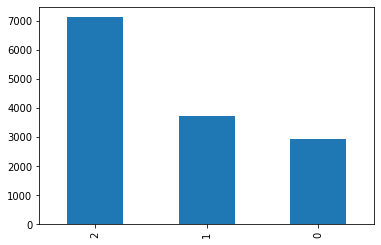

In [ ]:
def split_test_train_senti(df):
  # df = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv')
  # df["Sentiment"].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
  df = df[ df.Sentiment != 0 ]
  df["Sentiment"].replace({2:0},inplace=True)
  df1 = df.iloc[:9451]
  df2 = df.iloc[9451:]
  print(df2.shape)

  df1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/real_imb_emo_train.csv', index = False, header=False)
  df2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/real_imb_emo_test.csv', index = False, header=False)





# Function call to get the top 3000 from each sentiment
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_1.csv')
data["Sentiment"].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
# data = get_top_data(top_n=3400)
# print(data.shape)
# print(data[data.Sentiment==0].shape)
# print(data[data.Sentiment==1].shape)
# print(data[data.Sentiment==2].shape)
# print(data[data.Sentiment==3].shape)
# print(data[data.Sentiment==4].shape)
data.Sentiment.value_counts().plot.bar()
split_test_train_senti(data)

In [ ]:
G = np.zeros(5)
H = np.zeros_like([1,2,3], dtype= float)
print(G)
print(H)

[0. 0. 0. 0. 0.]
[0. 0. 0.]


(2951, 2)
(3000, 2)
None
(4951, 2)
(1000, 2)


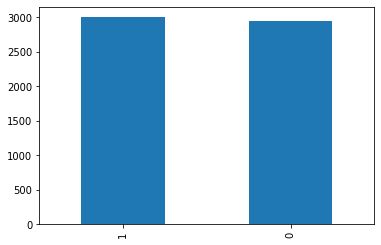

In [ ]:


def NeutOrNot(df):
  df["Sentiment"].replace({1:1, 2:1, 0:0, -1:1, -2:1 },inplace=True)
  df = get_top_data(top_n = 3000)
  print(df[df.Sentiment==0].shape)
  print(print(df[df.Sentiment==1].shape))
  df1 = df.iloc[:4951]
  df2 = df.iloc[4951:]
  print(df1.shape)
  print(df2.shape)
  df.Sentiment.value_counts().plot.bar()
  df1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/balance_neutral_or_not_train.csv', index = False, header=True)
  df2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/balance_neutral_or_not_test.csv', index = False, header=True)



data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_1.csv')
NeutOrNot(data)

(10851, 2)
(9451, 2)
(1400, 2)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


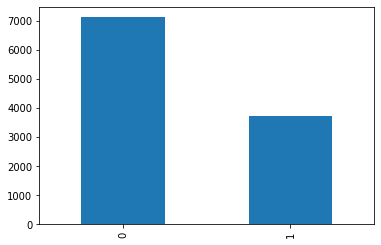

In [ ]:
def PosOrNeg(df):
  df["Sentiment"].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
  df = df[ df.Sentiment != 0 ]
  print(df.shape)
  
  df["Sentiment"].replace({2:0},inplace=True)
  df1 = df.iloc[:9451]
  df2 = df.iloc[9451:]
  
  print(df1.shape)
  print(df2.shape)
  df.Sentiment.value_counts().plot.bar()
  df1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/pos_or_neg_train.csv', index = False, header=True)
  df2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/pos_or_neg_test.csv', index = False, header=True)



data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_1.csv')
PosOrNeg(data)

(3725, 2)
(3000, 2)
(725, 2)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


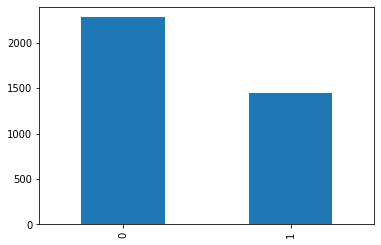

In [ ]:
def StrongPosOrNot(df):
  df["Sentiment"].replace({1:1, 2:2, 0:0, -1:0, -2:0 },inplace=True)
  df = df[ df.Sentiment != 0 ]
  print(df.shape)
  
  df["Sentiment"].replace({2:0},inplace=True)
  df1 = df.iloc[:3000]
  df2 = df.iloc[3000:]
  
  print(df1.shape)
  print(df2.shape)
  df.Sentiment.value_counts().plot.bar()
  df1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/strongPos_or_not_train.csv', index = False, header=True)
  df2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/strongPos_or_not_test.csv', index = False, header=True)



data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_1.csv')
StrongPosOrNot(data)

(7126, 2)
(6000, 2)
(1126, 2)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


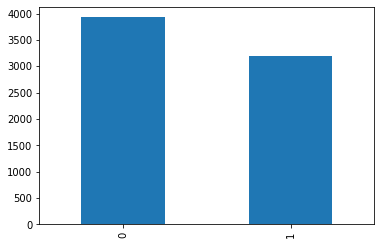

In [ ]:
def StrongNegOrNot(df):
  df["Sentiment"].replace({1:0, 2:0, 0:0, -1:1, -2:2 },inplace=True)
  df = df[ df.Sentiment != 0 ]
  print(df.shape)
  
  df["Sentiment"].replace({2:0},inplace=True)
  df1 = df.iloc[:6000]
  df2 = df.iloc[6000:]
  
  print(df1.shape)
  print(df2.shape)
  df.Sentiment.value_counts().plot.bar()
  df1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/strongNeg_or_not_train.csv', index = False, header=True)
  df2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/strongNeg_or_not_test.csv', index = False, header=True)



data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_1.csv')
StrongNegOrNot(data)

In [ ]:
def clas_3(df):
  df["Sentiment"].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
  print(df.shape)
  print(df[df.Sentiment==0].shape)
  print(df[df.Sentiment==1].shape)
  print(df[df.Sentiment==2].shape)
  df1 = df.iloc[:10802]
  df2 = df.iloc[10802:]
  df1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/3_class_train.csv', index = False, header=True)
  df2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/3_class_test.csv', index = False, header=True)
  
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_1.csv')
clas_3(data)

(13802, 2)
(2951, 2)
(3725, 2)
(7126, 2)


In [ ]:
def dump_pickle(ss):
  with open("/content/drive/My Drive/Research_Shanto/Shanto/pickle_stopwords.txt", "wb") as fp:   #Pickling
    pickle.dump(ss, fp)

In [ ]:
def stopword():

  stopwords = []
  with open("/content/drive/My Drive/Research_Shanto/Shanto/Stopwords.txt", "r") as file1:
      FileContent = file1.read()
      stopwords.append(FileContent)
  
  dump_pickle(stopwords)
  
stopword()

In [ ]:
def load_pickle(loc):
  with open(loc, "rb") as fp:   # Unpickling
    b = pickle.load(fp)
    return b

stopwords = load_pickle("/content/drive/My Drive/Research_Shanto/Shanto/pickle_stopwords.txt")

In [ ]:
def random_deletion(words, p):

    words = words.split()
    
    #obviously, if there's only one word, don't delete it
    if len(words) == 1:
        return words

    #randomly delete words with probability p
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    #if you end up deleting all words, just return a random word
    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return [words[rand_int]]

    sentence = ' '.join(new_words)
    
    return sentence

In [ ]:
def swap_word(new_words):
    
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        
        if counter > 3:
            return new_words
    
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        new_words = swap_word(new_words)
        
    sentence = ' '.join(new_words)
    
    return sentence

In [ ]:


def eda(data):
  fin = []
  print(data.head(10))
  cnt = 0
  for i in data['Data']:
      
      
      phrase = []
      phrase.append(i)
      phrase.append(data['Sentiment'][cnt])
      fin.append(phrase)
      
      cnt += 1
  print(len(fin))

  cnt = 0
  one_cnt = 3711
  for i in data['Data']:
      # print(swap_word(basic_t.tokenize(i)))
      phrase = []
      st = random_deletion(i, p =0.2)
      if( st != i and (data['Sentiment'][cnt] != 1)):
        # if(data['Sentiment'][cnt] == 1):
        #   one_cnt += 1
        #   if(one_cnt >= 7150):
          
        #     continue
        phrase.append(st)
        phrase.append(data['Sentiment'][cnt])
        fin.append(phrase)
        
      cnt += 1

  cnt = 0
  temp = pd.DataFrame(fin, columns = ['Data', 'Sentiment'])
  print(temp.head(10))
  print(temp.shape)
  print(temp[temp.Sentiment==0].shape)
  print(temp[temp.Sentiment==1].shape)
  temp.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/eda_neut_not.csv', index = False, header=True)
      

  

In [ ]:

data = read("/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv")
data['Sentiment'].replace({1:1, 2:1, 0:0, -1:1, -2:1 },inplace=True)
print(data["Sentiment"][0])
print(data[data.Sentiment==0].shape)
print(data[data.Sentiment==1].shape)
print(data.shape)
eda(data)

1
(2942, 2)
(10818, 2)
(13760, 2)
                                                Data  Sentiment
0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন           1
1  এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...          1
2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...          1
3                                    চুরি নয় লুটপাট           1
4  ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...          0
5          একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ           1
6  সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...          1
7    পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না           1
8     এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে           1
9  ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...          1
13760
                                                Data  Sentiment
0           লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন           1
1  এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...          1
2  আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...          1


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/Shakhor_Sentiment_0-1.csv')
data.columns = ['Sentiment', 'Data']
columns_titles = ["Data","Sentiment"]
data=data.reindex(columns=columns_titles)
data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/proc_Shakhor_0-1.csv',index=False, header = False)

In [55]:
# amar1 = ('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/pos_or_neg_train.csv')
# shakhor1 = ('/content/drive/My Drive/Research_Shanto/Datasets/proc_Shakhor_0-1.csv')
def append_csv(x,y):
  with open(y, 'r') as f1:
      original = f1.read()
  
  cnt = 0
  with open(x, 'a') as f2:
    if(cnt != 0):
      f2.write('\n')

    f2.write(original)
    cnt += 1

In [ ]:
df = read('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/pos_or_neg_train.csv')
print(df[df.Sentiment==0].shape)
print(df[df.Sentiment==1].shape)
print(df.groupby('Sentiment').Sentiment.count())

(0, 2)
(0, 2)
Sentiment
0            10967
1             7061
Sentiment        1
Name: Sentiment, dtype: int64


In [ ]:
df = df.dropna()
df.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/pos_or_neg_train.csv',index = False)

In [ ]:
data = get_top_data(df, top_n=7000)
print(data)
# data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/proc_pos_or_neg_train.csv',index=False, header = True)

Empty DataFrame
Columns: [Data, Sentiment]
Index: []


In [ ]:
def load_yelp_orig_data():
  PATH_TO_YELP_REVIEWS = '/content/drive/My Drive/Research_Shanto/Datasets/yelp_academic_dataset_review.json'
  with open(PATH_TO_YELP_REVIEWS, 'r') as f:
        data = f.readlines()
  data = map(lambda x: x.rstrip(), data)
  data_json_str = "[" + ','.join(data) + "]"
  data_df = pd.read_json(data_json_str)
  data_df.head(100000).to_csv(OUTPUT_FOLDER + '/output_reviews_top.csv')

load_yelp_orig_data()

In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/shakkhor bhai sentiment.csv')
data = data[data.Sentiment != 1]
data = data.dropna()

In [ ]:
temp = []

for w in data["Data"]:
  
  fin = []
  token = basic_t.tokenize(w)
  if(len(token) < 25 and  len(token) > 3 and len(temp) < 6000 ):
    # print(token)
    fin.append(w)
    fin.append('')
    temp.append(fin)

print(len(temp))
new = pd.DataFrame(temp, columns = ['Data', 'Sentiment'])
new = new.sample(n=6000);
new.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/5_class_incomplete.csv')
  
  


6000


In [ ]:

def txt_to_csv(txt_file, csv_file):
# with open('/content/drive/My Drive/Research_Shanto/Datasets/Subtask_A/twitter-2016train-A.txt', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(" ") for line in stripped if line)
#     with open('log.csv', 'w') as out_file:
#         writer = csv.writer(out_file)
#         writer.writerow(('index', 'Sentiment', 'Data'))
#         writer.writerows(lines)
# txt_file = "/content/drive/My Drive/Research_Shanto/Datasets/Subtask_A/twitter-2016test-A.txt"
# csv_file = "/content/drive/My Drive/Research_Shanto/Datasets/SemEvel_2016_test.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
  in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
  out_csv = csv.writer(open(csv_file, 'w'))

  # out_csv.writerow(['Index', 'Sentiment', 'Data'])
  out_csv.writerows(in_txt)

In [ ]:
txt_file = '/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/SemEvel 2017/SemEval2017-task4-dev.subtask-A.english.INPUT.txt'
csv_file = '/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/Subtask_A/SemEval_2017_train.csv'
txt_to_csv(txt_file, csv_file)

In [ ]:
main_data = ('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_train.csv')
suplimen_data = ('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/temp_test.csv')
append_csv(main_data,suplimen_data)


In [ ]:
def del_ind_change_sentiment(data):
  data = data.drop(['Index'], axis = 1)
  print(data.shape)
  
  # data["Sentiment"].replace({"positive":1, "negative":-1, "neutral":0 },inplace=True)
  columns_titles = ["Data","Sentiment"]
  data=data.reindex(columns=columns_titles)
  print(data.head(10))
  data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/Subtask_A/proc_SemEval_2016_train.csv')
  
  

data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/edit_SemEvel_2016_train.csv')
data.columns = ['Index','Data', 'Sentiment']
print(data.head(10))
del_ind_change_sentiment(data)

   Index                                               Data  Sentiment
0      0  dear @Microsoft the newOoffice for Mac is grea...         -1
1      1  @Microsoft how about you make a system that do...         -1
2      2  I may be ignorant on this issue but... should ...         -1
3      3  Thanks to @microsoft, I just may be switching ...         -1
4      4  If I make a game as a #windows10 Universal App...          0
5      5  Microsoft, I may not prefer your gaming branch...          1
6      6  @MikeWolf1980 @Microsoft I will be downgrading...         -1
7      7  @Microsoft 2nd computer with same error!!! #Wi...         -1
8      8  Just ordered my 1st ever tablet; @Microsoft Su...          1
9      9  After attempting a reinstall, it still bricks,...         -1
(19489, 2)
                                                Data  Sentiment
0  dear @Microsoft the newOoffice for Mac is grea...         -1
1  @Microsoft how about you make a system that do...         -1
2  I may be igno

In [ ]:

def datascience(data):
  data.Sentiment.value_counts().plot.bar()
  print(data.groupby('Sentiment').Sentiment.count())
  temp = []
  for cnt in range(len(data['Data'])):
    temp.append(len(word_tokenize(data.Data[cnt]) ))
    
  
  new = pd.DataFrame(temp, columns = ['Word Length'])
  print(new.head(10))
  # new.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/WordsPerSentence.csv')

  

data= pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_train.csv',header = None)
datascience(data)


ParserError: ignored

In [ ]:
import re
def eng_preprocess(data):

  temp = []

  for cnt in range(len(data['Data'])):
    fin = []
    paisi = False
    lower_case = data.Data[cnt].lower() #lower
    words = lower_case.split()
    # print(words)
    reformed = [appos[word] if word in appos else word for word in words] #negation
    reformed = " ".join(reformed) 
    reformed = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '',reformed)
    tokens = word_tokenize(reformed) #html removed

    # ---- @ -- Handled --- #

    mod_token = []
    # print(tokens)
    for w in range(len(tokens)): 
      if( (tokens[w] == '@' and (w == 0 or tokens[w-2] =='@' or w == len(tokens)-2 )) ): #@ handled
        paisi = True
        continue
      elif(paisi == True):
        paisi = False
      else:
        mod_token.append(tokens[w])

    
    tokens = [ele for ele in reversed(mod_token)] 
    mod_token = []
    press = 1
    for w in range(len(tokens)): 
      if(press == 2 and (tokens[w] == '@') ): #@ handled reversed
        mod_token.pop()
        press = 0
      elif(tokens[w] == '@'):
        continue
      else:
        mod_token.append(tokens[w])
      press += 1
    
    tokens = [ele for ele in reversed(mod_token)] 

    #--------------------------------------- Hashtag handled -------------------#
    # mod_token = []
    # for w in range(len(tokens)): 
    #   if( (tokens[w] == '@' and (w == 0 or tokens[w-2] =='@' or w == len(tokens)-2 )) or (tokens[w] == '#' and (w == 0 or tokens[w-2] =='#' or w == len(tokens)-2 )) ): #@ handled
    #     paisi = True
    #     continue
    #   elif(paisi == True):
    #     paisi = False
    #   else:
    #     mod_token.append(tokens[w])

    
    # tokens = [ele for ele in reversed(mod_token)] 
    # mod_token = []
    # press = 1
    # for w in range(len(tokens)): 
    #   if(press == 2 and (tokens[w] == '@' or tokens[w] == '#') ): #@ handled reversed
    #     mod_token.pop()
    #     press = 0
    #   elif(tokens[w] == '@' or tokens[w] == '#'):
    #     continue
    #   else:
    #     mod_token.append(tokens[w])
    #   press += 1
    
    # tokens = [ele for ele in reversed(mod_token)] 
     


    # print(tokens)
    words = [word for word in tokens if not word.isnumeric() and word.isalnum()] #numeric, handled
    # print(words)
    
    st = " ".join(words)
    # print(st)
    fin.append(st)
    # print(data['Data'][cnt])
    # print(st)
    # print()
    fin.append(data['Sentiment'][cnt])
    temp.append(fin)


    
  
  new = pd.DataFrame(temp, columns = ['Data','Sentiment'])
  new = new.dropna()
  print(new.shape)
  print(new.head(10))
  
  new.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_train.csv',index= False)



data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/Subtask_A/proc_SemEval_2016_train.csv' )
eng_preprocess(data)

(19489, 2)
                                                Data  Sentiment
0  dear microsoft the newooffice for mac is great...         -1
1  how about you make a system that does not eat ...         -1
2  i may be ignorant on this issue but should we ...         -1
3  thanks to microsoft i just may be switching ov...         -1
4  if i make a game as a windows10 universal app ...          0
5  microsoft i may not prefer your gaming branch ...          1
6  i will be downgrading and let windows10 be out...         -1
7  2nd computer with same error windows10fail gue...         -1
8  just ordered my 1st ever tablet microsoft surf...          1
9  after attempting a reinstall it still bricks s...         -1


In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
temp = []
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_test.csv')
data = data.dropna()
# data['Data'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in word_tokenize(data['Data']) ]
cnt = 0
for w in data['Data']:
  fin = []
  token = word_tokenize(w)
  port = [porter_stemmer.stem(word) for word in token]
  st = " ".join(port)
  try :
    fin.append(st)
    fin.append(data['Sentiment'][cnt])
    temp.append(fin)
    cnt += 1
  except:
    print("Yo")

new = pd.DataFrame(temp, columns = ['Data','Sentiment'])
new = new.dropna()
new.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/stem_SemEvel_2016_test.csv',index= False)
# data['Data'].head(10)

Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo
Yo


In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# import nltk
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer


# 2. Lemmatize Single Word with the appropriate POS tag

# 3. Lemmatize a Sentence with the appropriate POS tag
# sentence = "The striped bats are hanging on their feet for best"
def lemma(data):
  cnt = 0
  temp = []
  for sentence in data['Data']:
      fin = []
      words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]
      st = " ".join(words)
      try :
        fin.append(st)
        fin.append(data['Sentiment'][cnt])
        temp.append(fin)
        cnt += 1
      except:
        print("")
  new = pd.DataFrame(temp, columns = ['Data','Sentiment'])
  new = new.dropna()
  print(new.shape)
  new.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/lemmaH_SemEvel_2016_test.csv',index= False)
  
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/procH_SemEvel_2016_test.csv')
lemma(data)

    
#> ['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']

TypeError: ignored

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2017_train.csv')
data.columns = ["Index","Data", "Sentiment" ]
data = data.drop(['Index'], axis = 1)
print(data.head(10))
data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2017_train.csv', index = False, header =None)

                                                Data  Sentiment
0  a portion of book sales from our harper set a ...          1
1  excited to read go set a watchman on tuesday b...          1
2  watching miss usa tomorrow just to see travisg...          1
3  for the miss usa pageant on reelzchannel on su...          0
4  call for reservations for lunch or dinner tomo...          1
5  miss universe org prez tells me trump will not...          0
6  trump said june 30th that he would be at miss ...          0
7  have not read to kill a mockingbird in years t...          0
8  did you know that reelzchannel is airing miss ...          0
9  I have read the book several times so watching...          0


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_train.csv')
print(data.shape)
data = data.dropna()
print(data.shape)
print(data.head(10))
print(data.groupby('Sentiment').Sentiment.count())

data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_train.csv',index=False)


(43347, 2)
(43347, 2)
                                                Data  Sentiment
0  dear microsoft the newooffice for mac is great...         -1
1  how about you make a system that does not eat ...         -1
2  i may be ignorant on this issue but should we ...         -1
3  thanks to microsoft i just may be switching ov...         -1
4  if i make a game as a windows10 universal app ...          0
5  microsoft i may not prefer your gaming branch ...          1
6  i will be downgrading and let windows10 be out...         -1
7  2nd computer with same error windows10fail gue...         -1
8  just ordered my 1st ever tablet microsoft surf...          1
9  after attempting a reinstall it still bricks s...         -1
Sentiment
-1     9379
 0    18647
 1    15321
Name: Sentiment, dtype: int64


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/proc_SemEvel_2016_test.csv')
data = data[data.Sentiment != 0]
data = data[data.Sentiment != 1]
print(data.shape)
print(data.head(10))
data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/SemEvel/temp_test.csv', header = None, index= False)

(3231, 2)
                                                 Data  Sentiment
1   if these runway renovations at the airport pre...         -1
26  bad blood may have the absolute worst lyricism...         -1
32  my parents are going to the zac brown band con...         -1
38  the growth of gerontocracy george osborne assa...         -1
39  the hidden budget tax rises george osborne did...         -1
43  robbed by george osborne while the royals play...         -1
46  boko haram on saturday claimed responsibility ...         -1
47  gej needs a public apology from all those that...         -1
51  i remember chad calling boko haram school boys...         -1
52  by joe hemba damaturu nigeria july reuters bok...         -1


In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/ashik_dataset_2.csv')
df_tra = data.iloc[:9632]
df_val = data.iloc[9632:9632+1926]
df_tes = data.iloc[9632+1926:]
def see_each(df):
  print(df.groupby('Sentiment').Sentiment.count())
  print(df.shape)

see_each(df_tes)
df_tra['Sentiment'].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
df_val['Sentiment'].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)
df_tes['Sentiment'].replace({1:1, 2:1, 0:0, -1:2, -2:2 },inplace=True)

df_tra = df_tra[ df_tra.Sentiment != 0 ]
df_tra["Sentiment"].replace({2:0},inplace=True)
df_val = df_val[ df_val.Sentiment != 0 ]
df_val["Sentiment"].replace({2:0},inplace=True)
df_tes = df_tes[ df_tes.Sentiment != 0 ]
df_tes["Sentiment"].replace({2:0},inplace=True)

df_tra.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Data/2_class_train.csv',index = False)
df_val.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Data/2_class_val.csv',index = False)
df_tes.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Data/2_class_test.csv',index = False)


Sentiment
-2    456
-1    508
 0    647
 1    243
 2    348
Name: Sentiment, dtype: int64
(2202, 2)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/aspect_dataset.csv')

def partision(x,data):
  data1 = data[data.aspect == x]
  data1 = data[data.polarity != 'nt']
  # print(data1.shape)
  # print(data1.groupby('polarity').polarity.count())
  data1 = data1.drop(['polarity'], axis = 1)
  data1 = data1.drop(['aspect'], axis = 1)
  data1 = data1.sample(n=334);
  print(data1.shape)
  print(data1.dtypes)
  print(data1.head(10))
  data1.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/aspect_dataset_'+x+'.csv', header = None, index = None)


partision('politics',data)

(334, 1)
post    object
dtype: object
                                                   post
2595  ২০৭০সালের মধ্যে পুরো বিশ্ব দখল করে নেবে মুসলমা...
4500                       আমারবনদু মাহামুদললা ভাল খেলে
2316               দালাল এই  সাংবাদিকগণ ১০০/ মিথ্যা বলে
4265                                   সমাধান একটা চাই।
3861  বিসিবির ফটকে আগুন দেই... হোগায় আগুন ধরাই না দি...
6669                             সবার সেরা খালেদা জিয়া।
4849  মনে হয় কুন নাস্তিক ওই সময় মসজিদে গিয়েছিল শয়তান...
795                         এক ঠেলায় মুক্তি থেকে জামিন।
5990  ভাইয়া ডাঃ জাকির নায়েক কে নিয়ে কিছু বলবেন দয়া ক...
5398                         তোর আবালগিরী ছুটানোর জন্য।


In [59]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/5_class_incomplete.csv')
data = data.dropna()
data.columns = ['Index','Data', 'Sentiment']
print(data.groupby('Sentiment').Sentiment.count())

data = data.drop(['Index'], axis = 1)
print(data.head(10))
data=punc_conv(data)
data = process(data)
data = eng_dig_conv(data)
print(data.head(10))


Sentiment
-2.0     229
-1.0     997
 0.0    1785
 1.0     759
 2.0     290
Name: Sentiment, dtype: int64
                                                Data  Sentiment
0  অভিনয় তো চুল করতা এখন হয়ছিস ইউটিবার সালার তুই ...       -2.0
1            পাপন হলো আসল বাইঞ্চুদ হালায় পুরাই আবাল।       -2.0
2  ওরে গানডু  কাটা চোদা বাংলাদেশী ওটা ফিরনি নয় ওট...       -2.0
3  এখানে তো র‍্যাব এর অভি্যান হইসিল। জরিমানা করা ...       -2.0
4  দুর মিয়া তোমরা নমো না নমোরা কি গরুর মাংস খায় ন...       -2.0
5  এটাই নিয়ম, জোর যার মুল্লুক তার.?বাইন****দ.!পা...       -2.0
6  আর সাংঘাতিক বাইনচোদ যে কথা বলছে সে এডিসি না সে...       -2.0
7  ও কুততা আমি ওকে কুততা বলী ও মরার পর কুততা হয়ে...       -2.0
8         বাংলাদেশে এই বাইক আসলে দাম হইবো ৩কোটি টাকা       -2.0
9  বাংলাদেশের পুলিশ আর কুত্তার লেজ একই সবই নাটক  ...       -2.0
(4060, 2)
                                                Data  Sentiment
0  অভিনয় তো চুল করতা এখন হয়ছিস ইউটিবার সালার তুই ...       -2.0
1            পাপন হলো আসল বাইঞ্চুদ হালায় পুরাই আবাল  

In [60]:
data = data.dropna()
data["Sentiment"].replace({1.0:1, 2.0:1, 0.0:0, -1.0:2, -2.0:2 },inplace=True)
print(data.groupby('Sentiment').Sentiment.count())
data["Sentiment"] = data["Sentiment"].astype(int)
print(data.head(10))
print(data.shape)
# data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/proc_new.csv',header = False, index = False)

Sentiment
0.0    1781
1.0    1044
2.0    1225
Name: Sentiment, dtype: int64
                                                Data  Sentiment
0  অভিনয় তো চুল করতা এখন হয়ছিস ইউটিবার সালার তুই ...          2
1            পাপন হলো আসল বাইঞ্চুদ হালায় পুরাই আবাল           2
2  ওরে গানডু কাটা চোদা বাংলাদেশী ওটা ফিরনি নয় ওটা...          2
3  এখানে তো র‍্যাব এর অভি্যান হইসিল জরিমানা করা হ...          2
4  দুর মিয়া তোমরা নমো না নমোরা কি গরুর মাংস খায় ন...          2
5  এটাই নিয়ম   জোর যার মুল্লুক তার   বাইন দ   পা...          2
6  আর সাংঘাতিক বাইনচোদ যে কথা বলছে সে এডিসি না সে...          2
7  ও কুততা আমি ওকে কুততা বলী ও মরার পর কুততা হয়ে...          2
8        বাংলাদেশে এই বাইক আসলে দাম হইবো ৩কোটি টাকা           2
9  বাংলাদেশের পুলিশ আর কুত্তার লেজ একই সবই নাটক আ...          2
(4050, 2)


In [56]:
cla_3 = read('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/3_class_train.csv')
cla_3.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/3_class_train_dup.csv', index = False)

In [57]:
main_data = ('/content/drive/My Drive/Research_Shanto/Datasets/Hierchichal/Data/3_class_train_dup.csv')
suplimen_data = ('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/proc_new.csv')
append_csv(main_data,suplimen_data)

In [58]:
cla_2 = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/real_imb_senti_train.csv')
cla_2.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/real_imb_senti_train_dup.csv',index = False)

In [61]:
data = data[data.Sentiment != 0]
data["Sentiment"].replace({2:0 },inplace=True)
print(data.shape)
data.to_csv('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/proc_new_2_class.csv',header = False, index = False)

(2269, 2)


In [62]:
main_data = ('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/real_imb_senti_train_dup.csv')
suplimen_data = ('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/proc_new_2_class.csv')
append_csv(main_data,suplimen_data)

In [54]:
data = read('/content/drive/My Drive/Research_Shanto/Datasets/Ashik Bhai_Sentiment/Code/real_imb_senti_train_dup.csv')
print(data.shape)
data = data.dropna()
print(data.shape)
print(data.iloc[[9450]])

(11719, 2)
(11719, 2)
             লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন ।   0
9450  অভিনয় তো চুল করতা এখন হয়ছিস ইউটিবার সালার তুই ...  0
